In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("C:/SCFP2019.csv")
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (28885, 356)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


In [3]:
mask = df['TURNFEAR']==1
df_fear = df[mask]
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear shape: (4623, 356)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


# EDA

### AGE

In [4]:
age_groups = df['AGECL'].unique()
print("Age Groups:", age_groups)

Age Groups: [6 3 1 5 4 2]


In [5]:
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = df_fear['AGECL'].replace(agecl_dict)

print("age_cl shape:", age_cl.shape)
age_cl.head()

age_cl shape: (4623,)


5    45-54
6    45-54
7    45-54
8    45-54
9    45-54
Name: AGECL, dtype: object

<Axes: title={'center': 'Credit Fearful: Age Groups'}, xlabel='Age Group', ylabel='Count'>

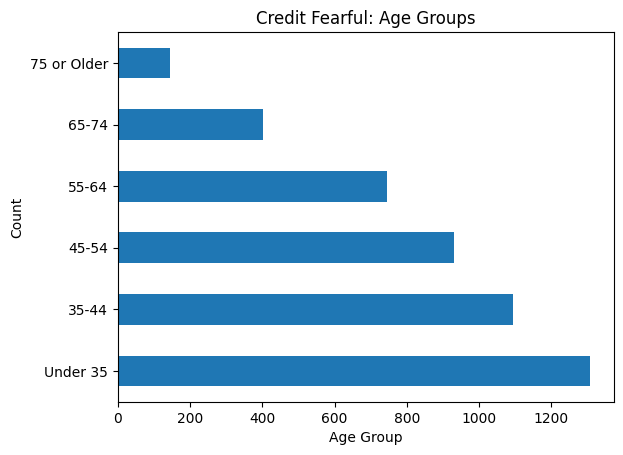

In [6]:
age_cl_value_counts = age_cl.value_counts()

# Bar plot of `age_cl_value_counts`
age_cl_value_counts.plot(kind='barh', xlabel="Age Group", ylabel='Count', title= 'Credit Fearful: Age Groups')

Text(0.5, 1.0, 'Credit Fearful: Age Distribution')

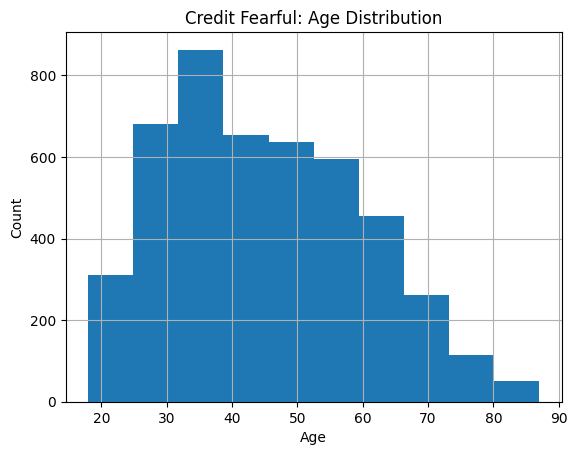

In [7]:
df_fear['AGE'].hist(bins=10)
plt.xlabel("Age")
plt.ylabel('Count')
plt.title("Credit Fearful: Age Distribution")

### Race

In [8]:
df_fear['RACE'].unique()

array([1, 3, 2, 5], dtype=int64)

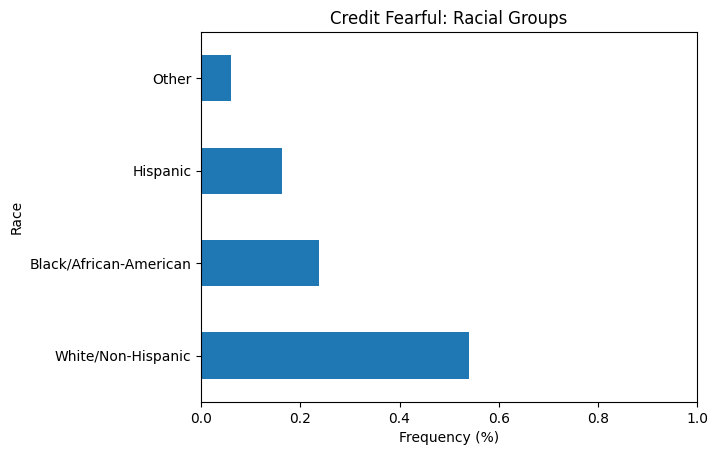

In [9]:
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race = df_fear["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind='barh')
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");

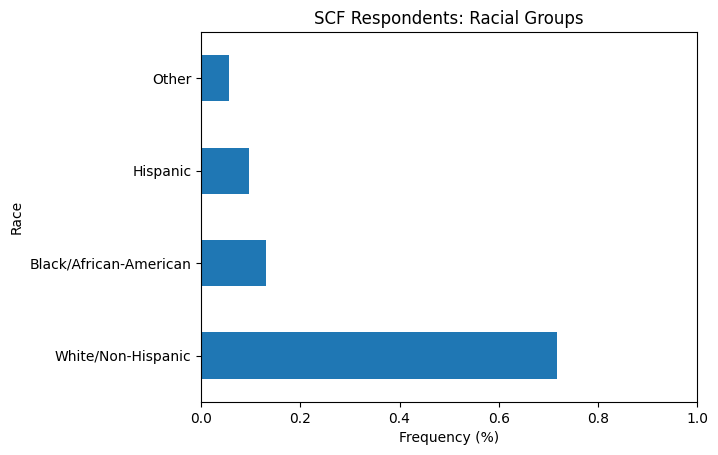

In [10]:
race = df["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind='barh')
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

### Income

In [11]:
df_fear['INCCAT'].unique()

array([2, 1, 3, 6, 4, 5], dtype=int64)

In [12]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = (
    df['INCCAT'].replace(inccat_dict).groupby(df['TURNFEAR']).value_counts(normalize=True).rename('frequency').to_frame().reset_index()
)

print("df_inccat shape:", df_inccat.shape)
df_inccat

df_inccat shape: (12, 3)


,TURNFEAR,INCCAT,frequency
0,0,90-100,0.297296
1,0,60-79.9,0.174841
2,0,40-59.9,0.143146
3,0,0-20,0.140343
4,0,21-39.9,0.135933
5,0,80-89.9,0.108441
6,1,0-20,0.288125
7,1,21-39.9,0.256327
8,1,40-59.9,0.228856
9,1,60-79.9,0.132598


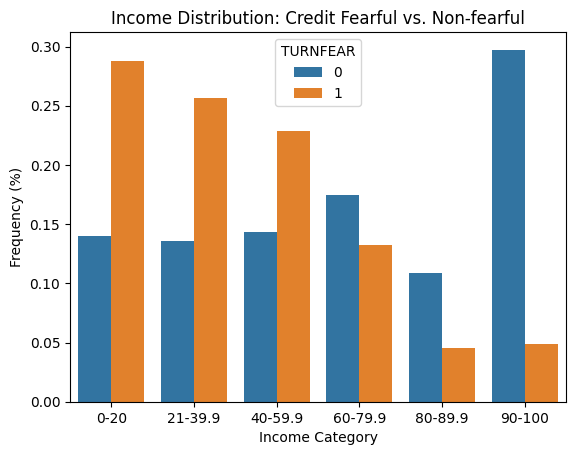

In [13]:
# Create bar chart of `df_inccat`
sns.barplot(
    x='INCCAT',
    y="frequency",
    data=df_inccat, hue="TURNFEAR", order=inccat_dict.values())
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

### Assets - the ability to carry debt 

In [14]:
df_fear[['ASSET', 'HOUSES']].describe()

,ASSET,HOUSES
count,4.623000e+03,4.623000e+03
mean,1.791445e+06,2.211742e+05
std,2.062658e+07,1.582897e+06
min,0.000000e+00,0.000000e+00
25%,9.233070e+03,0.000000e+00
50%,3.732641e+04,0.000000e+00
75%,2.501159e+05,1.449007e+05
max,5.994111e+08,4.299492e+07


In [15]:
df[['ASSET', 'HOUSES']].describe()

,ASSET,HOUSES
count,2.888500e+04,2.888500e+04
mean,1.594722e+07,8.399192e+05
std,9.183215e+07,3.035726e+06
min,0.000000e+00,0.000000e+00
25%,5.819211e+04,0.000000e+00
50%,4.261239e+05,2.086570e+05
75%,2.122969e+06,5.714882e+05
max,2.280388e+09,1.234322e+08


In [16]:
asset_house_corr = df['ASSET'].corr(df['HOUSES'])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.5198273544793153


In [17]:
asset_house_corr =  df_fear['ASSET'].corr(df['HOUSES'])
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)

Credit Fearful: Asset Houses Correlation: 0.5832879735998714


### WHOLE DATASET CORRELATION

In [18]:

cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.519827,0.622429,0.261250,0.116673
HOUSES,0.519827,1.000000,0.247852,0.266661,0.169300
INCOME,0.622429,0.247852,1.000000,0.114646,0.069400
DEBT,0.261250,0.266661,0.114646,1.000000,0.054179
EDUC,0.116673,0.169300,0.069400,0.054179,1.000000


### DF_FEAR CORRELATION

In [19]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df_fear[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.583288,0.722074,0.474658,0.113536
HOUSES,0.583288,1.000000,0.264099,0.962629,0.160348
INCOME,0.722074,0.264099,1.000000,0.172393,0.133170
DEBT,0.474658,0.962629,0.172393,1.000000,0.177386
EDUC,0.113536,0.160348,0.133170,0.177386,1.000000


### Education

In [20]:
df['EDUC'].unique()

array([12,  8, 13, 10,  9, 11, 14,  2,  6,  7,  3,  5,  1,  4, -1],
      dtype=int64)

In [21]:
educ_dict = {
    -1: "less than 1st grade",
    1: "1st , 2nd, 3rd, 4th grade",
    2: "5th, 6th grade",
    3: "7th, 8th grade",
    4: "9th grade",
    5: "10th grade",
    6: "11th grade",
    7: "12th grade",
    8: "High school Graduate",
    9: "Some College but no degree",
    10: "ASSOCIATE DEGREE IN COLLEGE - OCCUPATION",
    11: "ASSOCIATE DEGREE IN COLLEGE - ACADEMIC",
    12: "BACHELOR'S DEGREE",
    13: "MASTER'S DEFREE",
    14: "DOCTORATE DEGREE"
}

df_educ = (
    df['EDUC'].replace(educ_dict).groupby(df['TURNFEAR']).value_counts(normalize=True).rename('frequency').to_frame().reset_index()
)

print("df_educ type:", type(df_educ))
print("df_educ shape:", df_educ.shape)
df_educ.head()

df_educ type: <class 'pandas.core.frame.DataFrame'>
df_educ shape: (30, 3)


,TURNFEAR,EDUC,frequency
0,0,BACHELOR'S DEGREE,0.257481
1,0,High school Graduate,0.192029
2,0,MASTER'S DEFREE,0.149823
3,0,Some College but no degree,0.129833
4,0,DOCTORATE DEGREE,0.096117


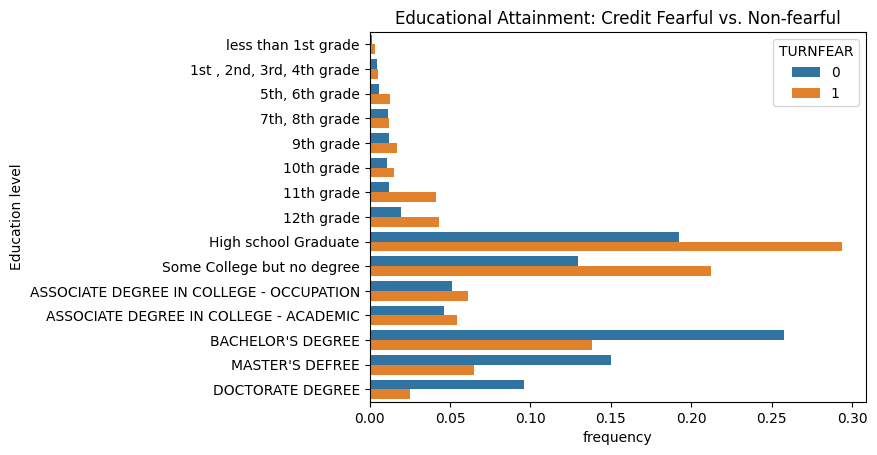

In [22]:
sns.barplot(
    y='EDUC',
    x="frequency",
    data=df_educ, hue="TURNFEAR", order=educ_dict.values(), orient='h')
plt.xlabel("frequency")
plt.ylabel("Education level")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

### DEBT

<Axes: xlabel='DEBT', ylabel='ASSET'>

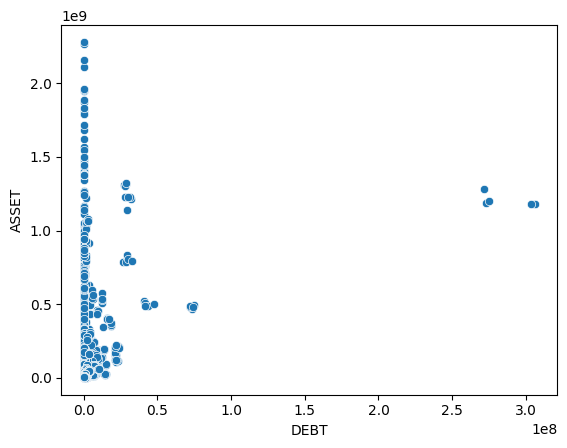

In [23]:
sns.scatterplot(x='DEBT', y='ASSET', data=df)

<Axes: xlabel='DEBT', ylabel='ASSET'>

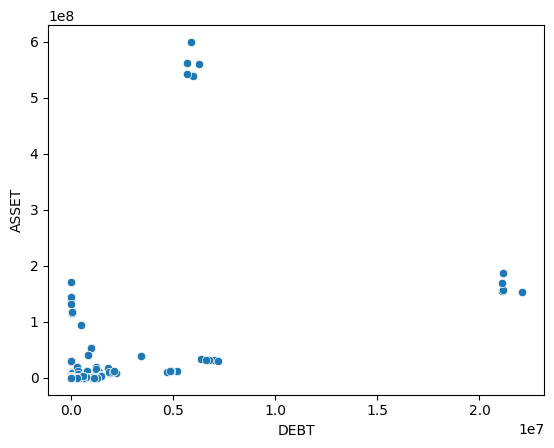

In [24]:
sns.scatterplot(x='DEBT', y='ASSET', data=df_fear)

<Axes: xlabel='DEBT', ylabel='HOUSES'>

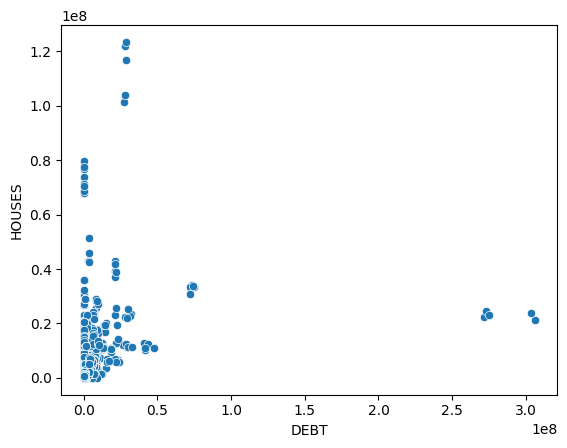

In [25]:
sns.scatterplot(x="DEBT", y="HOUSES", data=df)

<Axes: xlabel='DEBT', ylabel='HOUSES'>

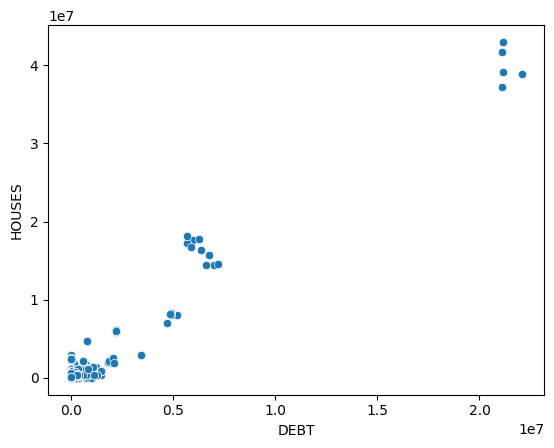

In [26]:
sns.scatterplot(x="DEBT", y="HOUSES", data=df_fear)

## Clustering using high variance features

In [27]:
import plotly.express as px
from scipy.stats.mstats import trimmed_var
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [28]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    mask = (df['TURNFEAR']==1) & (df['NETWORTH']<2000000)
    df = df[mask]
    return df

In [29]:
df = wrangle("C:/SCFP2019.csv")
print("df shape:", df.shape)
df.head()

df shape: (4407, 356)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


In [30]:
top_ten_var = df.var().sort_values().tail(10)

print("top_ten_var shape:", top_ten_var.shape)
top_ten_var

top_ten_var shape: (10,)


PLOAN1      1.508048e+10
ACTBUS      1.677175e+10
BUS         1.683586e+10
KGTOTAL     1.801415e+10
DEBT        2.457563e+10
HOUSES      3.025930e+10
NHNFIN      3.958070e+10
NETWORTH    5.446911e+10
NFIN        7.370790e+10
ASSET       9.864096e+10
dtype: float64

In [31]:
fig = px.bar(x=top_ten_var, y=top_ten_var.index, title="SCF: High Variance Features")
fig.update_layout(xaxis_title="variance", yaxis_title="features")

fig.show()

In [32]:
fig = px.box(data_frame=df, x="NHNFIN", title= "Distribution of Non-home, Non-Financial Assets" )
fig.update_layout(xaxis_title="Value $")
fig.show()

In [33]:
top_ten_trim_var = df.apply(trimmed_var).sort_values().tail(10)

print("top_ten_trim_var type:", type(top_ten_trim_var))
print("top_ten_trim_var shape:", top_ten_trim_var.shape)
top_ten_trim_var

top_ten_trim_var type: <class 'pandas.core.series.Series'>
top_ten_trim_var shape: (10,)


WAGEINC     7.415894e+08
HOMEEQ      9.548834e+08
NH_MORT     1.755886e+09
MRTHEL      1.819848e+09
PLOAN1      1.902850e+09
NETWORTH    4.011771e+09
DEBT        4.099576e+09
HOUSES      6.508833e+09
NFIN        1.108097e+10
ASSET       1.530852e+10
dtype: float64

In [34]:
fig = px.bar(x=top_ten_trim_var, y=top_ten_trim_var.index, title="SCF: High Variance Features")
fig.update_layout(xaxis_title="variance", yaxis_title="features")

fig.show()

In [35]:
high_var_cols = top_ten_trim_var.tail(5).index.to_list()

print("high_var_cols len:", len(top_ten_trim_var))
high_var_cols

high_var_cols len: 10


['NETWORTH', 'DEBT', 'HOUSES', 'NFIN', 'ASSET']

In [36]:
X = df[high_var_cols]

print("X type:", type(X))
print("X shape:", X.shape)
X.head()

X type: <class 'pandas.core.frame.DataFrame'>
X shape: (4407, 5)


,NETWORTH,DEBT,HOUSES,NFIN,ASSET
5,-7778.267550,14142.304636,0.0,4520.900662,6364.037086
6,-5459.856954,14605.986755,0.0,7302.993377,9146.129801
7,-9406.950993,17735.841060,0.0,6491.549669,8328.890066
8,-2909.605298,16344.794702,0.0,11592.052980,13435.189404
9,-6624.858278,17851.761589,0.0,9389.562914,11226.903311


In [37]:
# Instantiate transformer
ss = StandardScaler()

# Transform `X`
X_scaled_data = ss.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled_data, columns=X.columns)

print("X_scaled shape:", X_scaled.shape)
X_scaled.head()

X_scaled shape: (4407, 5)


,NETWORTH,DEBT,HOUSES,NFIN,ASSET
0,-0.390568,-0.444027,-0.485262,-0.475192,-0.511863
1,-0.380633,-0.441069,-0.485262,-0.464943,-0.503004
2,-0.397547,-0.421102,-0.485262,-0.467932,-0.505606
3,-0.369704,-0.429976,-0.485262,-0.449143,-0.489346
4,-0.385625,-0.420362,-0.485262,-0.457257,-0.496378


In [38]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    model = make_pipeline(StandardScaler(), KMeans(n_clusters=k, random_state=42))
    model.fit(X)
    inertia_errors.append(model.named_steps["kmeans"].inertia_)
    silhouette_scores.append(silhouette_score(X,model.named_steps["kmeans"].labels_))

print("inertia_errors type:", type(inertia_errors))
print("inertia_errors len:", len(inertia_errors))
print("Inertia:", inertia_errors)
print()
print("silhouette_scores type:", type(silhouette_scores))
print("silhouette_scores len:", len(silhouette_scores))
print("Silhouette Scores:", silhouette_scores)

c:\Users\alisa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\alisa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\alisa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\alisa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

inertia_errors type: <class 'list'>
inertia_errors len: 11
Inertia: [10900.236324338817, 7282.155740431512, 5921.438502894861, 5016.28448973526, 4300.18119763811, 3745.8652845232104, 3158.7109694686815, 2878.655350292561, 2656.705325175511, 2430.4521375146073, 2245.771794317289]

silhouette_scores type: <class 'list'>
silhouette_scores len: 11
Silhouette Scores: [0.7456405015578531, 0.7054175832593965, 0.6915196830648745, 0.6579331021067493, 0.6502914919387532, 0.6457632061774676, 0.6572096495583863, 0.6345154924999761, 0.5930819511086807, 0.5992954540516777, 0.5781270862660306]


In [39]:
fig = px.line(x=n_clusters, y=inertia_errors, title="K-Means Model: Inertia vs Number of Clusters")
fig.update_layout(xaxis_title="Number of Clusters", yaxis_title="Inertia")

fig.show()

In [40]:
fig = px.line(x=n_clusters, y=silhouette_scores, title="K-Means Model: Silhouette Score vs Number of Clusters")
fig.update_layout(xaxis_title="Number of Clusters", yaxis_title="Silhouette Score")

fig.show()

In [41]:
# Build model
final_model = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=42))

# Fit model to data
final_model.fit(X)


c:\Users\alisa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

In [42]:
labels = final_model.named_steps['kmeans'].labels_

print("labels type:", type(labels))
print("labels len:", len(labels))
print(labels[:5])

labels type: <class 'numpy.ndarray'>
labels len: 4407
[1 1 1 1 1]


In [43]:
xgb = X.groupby(labels).mean()

print("xgb type:", type(xgb))
print("xgb shape:", xgb.shape)
xgb

xgb type: <class 'pandas.core.frame.DataFrame'>
xgb shape: (3, 5)


,NETWORTH,DEBT,HOUSES,NFIN,ASSET
0,262919.690371,236674.838229,298624.324035,4.014690e+05,4.995945e+05
1,13226.632124,33234.450780,16552.348600,3.234341e+04,4.646108e+04
2,995756.053534,565411.104731,666277.173580,1.383254e+06,1.561167e+06


In [44]:
fig = px.bar(xgb, barmode='group', title="Mean Household Finances by Cluster")
fig.update_layout(xaxis_title="Cluster", yaxis_title="Value [$]")

fig.show()

In [45]:
# Instantiate transformer
pca = PCA(n_components=2, random_state=42)

# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t, columns=["PC1","PC2"])

print("X_pca type:", type(X_pca))
print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca type: <class 'pandas.core.frame.DataFrame'>
X_pca shape: (4407, 2)


,PC1,PC2
0,-249467.153516,-20504.439053
1,-245134.044844,-21621.580659
2,-247019.246103,-17108.088264
3,-238646.799054,-22031.877446
4,-242436.415674,-18742.103863


In [46]:
fig = px.scatter(data_frame=X_pca, x="PC1", y="PC2", color=labels.astype('str'), title="PCA Representation of Clusters")
fig.update_layout(xaxis_title="PC1", yaxis_title="PC2")

fig.show()

In [49]:
import joblib
joblib.dump(final_model,'SCF2.pkl')



['SCF2.pkl']